<a href="https://colab.research.google.com/github/gantapriyanka1325/DeepLearningLab/blob/main/program_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#6 Design and implement a simple RNN model with tensor flow / keras and check accuracy.
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding,SimpleRNN,Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
#1 load datatset
df=pd.read_csv("netflix_titles.csv.csv")
print("Dataset Loaded")
print(df.head())

Dataset Loaded
  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 2

In [ ]:
#2 select relevant columns
df=df[['type','description']].dropna()

In [ ]:
#3 encode target labels(movie=0,tv show=1)
label_encoder=LabelEncoder()
df['type_encoded']=label_encoder.fit_transform(df['type'])

In [ ]:
#4 text preprocessing
texts=df['description'].values
labels=df['type_encoded'].values

In [ ]:
#5 tokenizer text data
vocab_size=5000
tokenizer=Tokenizer(num_words=vocab_size,oov_token="<OOV>")
tokenizer.fit_on_texts(texts)
sequences=tokenizer.texts_to_sequences(texts)
padded=pad_sequences(sequences,maxlen=100,padding='post',truncating='post')

In [ ]:
#6 split data
x_train,x_test,y_train,y_test=train_test_split(padded,labels,test_size=0.2,random_state=42)

In [ ]:
#7 build RNN model
model=Sequential([
    Embedding(vocab_size,64,input_length=100),
    SimpleRNN(64,activation='tanh'),
    Dense(32,activation='relu'),
    Dense(1,activation='sigmoid')
])

C:\Users\students\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
#8 compile model
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
#9 train model
history=model.fit(x_train,y_train,epochs=5,batch_size=32,validation_split=0.2,verbose=1)

Epoch 1/5
177/177 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.6968 - loss: 0.6147 - val_accuracy: 0.6948 - val_loss: 0.6154
Epoch 2/5
177/177 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.6987 - loss: 0.6143 - val_accuracy: 0.6948 - val_loss: 0.6191
Epoch 3/5
177/177 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.6987 - loss: 0.6158 - val_accuracy: 0.6948 - val_loss: 0.6169
Epoch 4/5
177/177 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.6987 - loss: 0.6136 - val_accuracy: 0.6948 - val_loss: 0.6165
Epoch 5/5
177/177 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.6987 - loss: 0.6127 - val_accuracy: 0.6948 - val_loss: 0.6153


In [ ]:
#10 Evaluate Model
y_pred = (model.predict(x_test) > 0.5).astype("int32")
acc = accuracy_score(y_test, y_pred)
print(f"\n Test Accuracy: {acc:.4f}")

56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step

 Test Accuracy: 0.6890


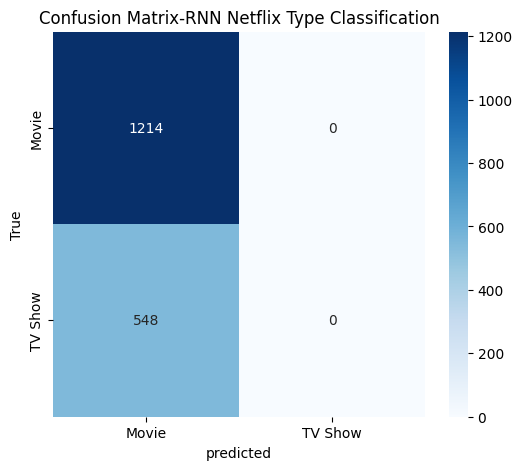

In [ ]:
#11 confusion matrix
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues',xticklabels=['Movie','TV Show'],yticklabels=['Movie','TV Show'])
plt.xlabel("predicted")
plt.ylabel("True")
plt.title("Confusion Matrix-RNN Netflix Type Classification")
plt.show()

In [ ]:
#12 classification report
print("\n📊 Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=['Movie', 'TV Show']))


📊 Classification Report:

              precision    recall  f1-score   support

       Movie       0.69      1.00      0.82      1214
     TV Show       0.00      0.00      0.00       548

    accuracy                           0.69      1762
   macro avg       0.34      0.50      0.41      1762
weighted avg       0.47      0.69      0.56      1762



C:\Users\students\.conda\envs\tensorflow_env\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\students\.conda\envs\tensorflow_env\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\students\.conda\envs\tensorflow_env\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capi